# Salifort Motors: Employee Retention Project

[Google Advanced Data Analytics](https://www.coursera.org/professional-certificates/google-advanced-data-analytics) Capstone Project by [Markku Laine](https://markkulaine.com) (2023)

### Overview

*Salifort Motors* is a fictional French-based alternative energy vehicle manufacturer with over 100,000 employees worldwide. Its senior leadership has asked the data team to analyze the survey data collected by the HR department and provide recommendations for how to increase employee retention. In addition, the goal is to build a machine learning model based on the survey data that predicts whether an employee will leave the company. A successful outcome will help the company to increase retention and job satisfaction for current employees, and save money and time in recruiting and training new employees.

### Dataset

This project uses an [HR dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction) from Kaggle. The dataset contains 14,999 rows and 10 columns, each row representing self-reported information from employees.

| Variable | Description |
| :--- | :--- |
| satisfaction_level | The employee's self-reported satisfaction level [0&ndash;1] |
| last_evaluation | The score of employee's last performance review [0&ndash;1] |
| number_project | The number of projects employee contributes to |
| average_montly_hours | The average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years) |
| Work_accident | Whether or not the employee experienced an accident while at work |
| left | Whether or not the employee left the company |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years |
| Department | The employee's department |
| salary | The employee's salary (low, medium, high) |

---
## 1 Setup

Let's start by importing relevant Python libraries and loading datasets for analysis.

### 1.1 Import Libraries

In [1]:
# Standard library modules
import pathlib
from typing import Any

# Third-party modules
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from titlecase import titlecase
from xgboost import XGBClassifier

# First-party modules
from utils import (
    build_tuned_model,
    check_duplicates,
    check_missing_values,
    check_outliers,
    compare_tuned_models,
    evaluate_model,
    save_model,
    show_categories,
    show_column_names,
    show_dist_values,
    show_dist_values_grouped,
    show_mean_median_grouped,
    show_shape_and_size,
    show_unique_values,
    visualize_corr_hm,
    visualize_corr_pr,
    visualize_dist_cat,
    visualize_dist_num,
    visualize_dist_vs,
    visualize_outliers,
)

# Configurations
pd.set_option("display.max_columns", None)  # display all columns

### 1.2 Load Datasets

In [2]:
# HR dataset
hr_dataset_filepath = pathlib.Path("datasets/hr_dataset.csv")
df_hr_dataset = pd.read_csv(hr_dataset_filepath)

---
## 2 Exploratory Data Analysis

In this section, we will conduct a thorough analysis of the HR dataset, guided by Google's well-defined framework for exploratory data analysis (EDA). The EDA process encompasses six distinct practices—discovering, structuring, cleaning, joining, validating, and presenting—that can be flexibly applied in any order and repeated as many times as necessary.

In [3]:
# Copy the dataframe and reset index
df_eda = df_hr_dataset.copy()
df_eda = df_eda.reset_index(drop=True)

### 2.1 Discovering

The first step is to get familiar with the data so that we can start conceptualizing how to most effectively use it.

#### Data Overview

In [4]:
# Display the first 10 rows
df_eda.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#### Summary Information

In [5]:
# Display summary information, including column names, non-null values, and data types
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Shape and Size

In [6]:
# Show shape and size
show_shape_and_size(df_eda)

Shape: 14,999 rows and 10 columns
Size:  149,990 elements


#### Columns

In [7]:
# Show column names
show_column_names(df_eda)

Columns: satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department, salary


#### Unique Values

In [8]:
# Show unique values in 'Department'
show_unique_values(df_eda, "Department")

Unique values in 'Department': accounting, hr, IT, management, marketing, product_mng, RandD, sales, support, technical


In [9]:
# Show unique values in 'salary'
show_unique_values(df_eda, "salary")

Unique values in 'salary': high, low, medium


#### Descriptive Statistics

In [10]:
# Generate summary statistics
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


#### Summary

- The dataset has a total of 14,999 rows and 10 columns.
- The naming of columns is inconsistent, and there are spelling mistakes.
- There are no missing values in the dataset.
- Most of the variables are numeric:
  - `number_project`, `average_montly_hours`, `time_spend_company`, `Work_accident`, `left` (target), and `promotion_last_5years` are discrete, of which the last three are binary.
  - `satisfaction_level` and `last_evaluation` are continuous.
- `Department` and `salary` are categorical, of which the former is nominal and the latter is ordinal.
- The naming of categories in the `Department` column is inconsistent.
- The values in each column appear to be valid.

### 2.2 Structuring

The purpose of this step is to organize and transform our data to be more easily worked with in subsequent steps.

#### Rename Columns

In [11]:
# Rename some columns
column_name_dict = {
    "last_evaluation": "evaluation_score",
    "number_project": "projects",
    "average_montly_hours": "monthly_hours",
    "time_spend_company": "tenure",
    "Work_accident": "accident",
    "promotion_last_5years": "promoted",
    "Department": "department",
    "salary": "salary_level",
}
df_eda = df_eda.rename(columns=column_name_dict)

In [12]:
# Verify changes in column names
show_column_names(df_eda)

Columns: satisfaction_level, evaluation_score, projects, monthly_hours, tenure, accident, left, promoted, department, salary_level


### 2.3 Cleaning

By cleaning the data, we ensure its usefulness. The process typically involves converting data types as well as handling missing values, duplicates, outliers, and other types of dirty data.

#### Convert Data Types

In [13]:
# Convert the "department" and "salary_level" columns to category
df_eda["department"] = df_eda["department"].astype("category")
df_eda["salary_level"] = pd.Categorical(df_eda["salary_level"], categories=["low", "medium", "high"], ordered=True)

In [14]:
# Verify changes in data types
df_eda.dtypes

satisfaction_level     float64
evaluation_score       float64
projects                 int64
monthly_hours            int64
tenure                   int64
accident                 int64
left                     int64
promoted                 int64
department            category
salary_level          category
dtype: object

In [15]:
# Verify changes in categories and their order
show_categories(df_eda, "department")
show_categories(df_eda, "salary_level")

Categories in 'department' (ordered=False): IT, RandD, accounting, hr, management, marketing, product_mng, sales, support, technical
Categories in 'salary_level' (ordered=True): low, medium, high


#### Rename Departments

In [16]:
# Title case departments
def handle_special_department_names(department_name: str, **kwargs) -> str | None:
    """
    Handles special department names by mapping them to their full names.

    Args:
        department_name (str): The department name to be handled.
        **kwargs: Additional keyword arguments.

    Returns:
        str | None: The full name of the department if it is a special case; otherwise, None.
    """
    department_name_dict = {
        "hr": "Human Resources",
        "IT": "Information Technology",
        "product_mng": "Product Management",
        "RandD": "Research and Development",
    }
    if department_name in department_name_dict:
        return department_name_dict[department_name]

department_name_dict = {department_name: titlecase(department_name, callback=handle_special_department_names) for department_name in df_eda["department"].unique()}
df_eda["department"] = df_eda["department"].replace(department_name_dict)

In [17]:
# Verify changes in department names
show_categories(df_eda, "department")

Categories in 'department' (ordered=False): Information Technology, Research and Development, Accounting, Human Resources, Management, Marketing, Product Management, Sales, Support, Technical


#### Missing Values

In [18]:
# Check for missing values
check_missing_values(df_eda)

,Missing values (#),Missing values (%)
satisfaction_level,0,0.0
evaluation_score,0,0.0
projects,0,0.0
monthly_hours,0,0.0
tenure,0,0.0
accident,0,0.0
left,0,0.0
promoted,0,0.0
department,0,0.0
salary_level,0,0.0


There are no missing values in the dataset, as observed earlier.

#### Duplicates

In [19]:
# Check for duplicates
check_duplicates(df_eda)

Duplicates: 3,008 (20.05%)


In [20]:
# Inspect duplicates
df_eda[df_eda.duplicated(keep=False)].sort_values(df_eda.columns.tolist()).head(10)

,satisfaction_level,evaluation_score,projects,monthly_hours,tenure,accident,left,promoted,department,salary_level
30,0.09,0.62,6,294,4,0,1,0,Accounting,low
12030,0.09,0.62,6,294,4,0,1,0,Accounting,low
14241,0.09,0.62,6,294,4,0,1,0,Accounting,low
71,0.09,0.77,5,275,4,0,1,0,Product Management,medium
12071,0.09,0.77,5,275,4,0,1,0,Product Management,medium
14282,0.09,0.77,5,275,4,0,1,0,Product Management,medium
652,0.09,0.77,6,290,4,0,1,0,Technical,medium
12652,0.09,0.77,6,290,4,0,1,0,Technical,medium
14863,0.09,0.77,6,290,4,0,1,0,Technical,medium
278,0.09,0.78,6,254,4,0,1,0,Support,low


The dataset has 3,008 duplicate rows, accounting for 20.05% of all rows. The duplicates are most likely the result of several employees taking the survey multiple times, and thus they can be safely dropped. The reasoning behind this decision is that the dataset has multiple variables of which many are continuous, making it highly unlikely that several employees entered exactly the same values.

In [21]:
# Drop duplicates
df_eda = df_eda.drop_duplicates(keep="first")

In [22]:
# Verify changes in duplicates
check_duplicates(df_eda)

Duplicates: 0 (0.00%)


In [23]:
# Verify changes in shape and size
show_shape_and_size(df_eda)

Shape: 11,991 rows and 10 columns
Size:  119,910 elements


#### Outliers

In [24]:
# Check for outliers in non-binary, numeric variables
check_outliers(df_eda, ["satisfaction_level", "evaluation_score", "projects", "monthly_hours", "tenure"])

,Outliers (#),Outliers (%)
satisfaction_level,0,0.00
evaluation_score,0,0.00
projects,0,0.00
monthly_hours,0,0.00
tenure,824,6.87


The `tenure` column has 824 outliers, which is 6.87% of all column values. Let's take a closer look at the outliers with a boxplot visualization.

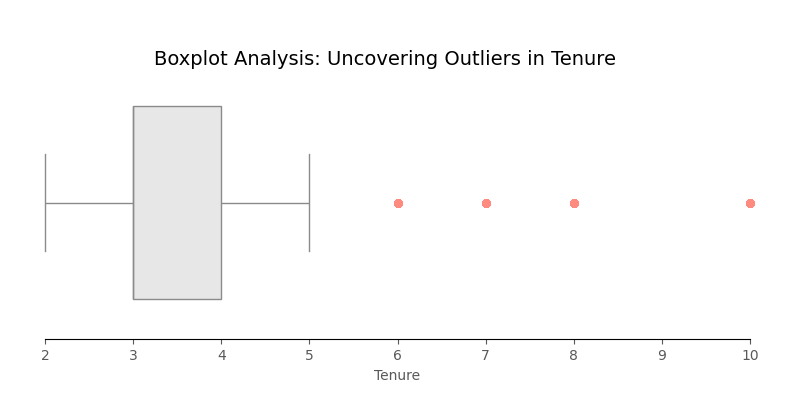

In [25]:
# Visualize outliers
visualize_outliers(df_eda, "tenure")

All values in the `tenure` column appear to be valid (between 2 and 10). The outliers can be left in the dataset for the time being, as some of the classification models we may use are robust to them.

### 2.4 Joining

Joining is the process of augmenting or adjusting data by adding values from other datasets. Since we only have one dataset, this step can be skipped.

### 2.5 Validating

Validating ensures that the data is of high quality. Earlier, we verified the integrity of our data upon each change, and now it's time to perform the final validation before proceeding with visualizations.

#### Summary Information

In [26]:
# Display summary information, including rows, columns, indices, column names, non-null values, and data types
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   satisfaction_level  11991 non-null  float64 
 1   evaluation_score    11991 non-null  float64 
 2   projects            11991 non-null  int64   
 3   monthly_hours       11991 non-null  int64   
 4   tenure              11991 non-null  int64   
 5   accident            11991 non-null  int64   
 6   left                11991 non-null  int64   
 7   promoted            11991 non-null  int64   
 8   department          11991 non-null  category
 9   salary_level        11991 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 867.0 KB


#### Categories

In [27]:
# Show categories and their order
show_categories(df_eda, "department")
show_categories(df_eda, "salary_level")

Categories in 'department' (ordered=False): Information Technology, Research and Development, Accounting, Human Resources, Management, Marketing, Product Management, Sales, Support, Technical
Categories in 'salary_level' (ordered=True): low, medium, high


#### Descriptive Statistics

In [28]:
# Generate summary statistics
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
evaluation_score,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
projects,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
monthly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
tenure,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promoted,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


#### Missing Values

In [29]:
# Check for missing values
check_missing_values(df_eda)

,Missing values (#),Missing values (%)
satisfaction_level,0,0.0
evaluation_score,0,0.0
projects,0,0.0
monthly_hours,0,0.0
tenure,0,0.0
accident,0,0.0
left,0,0.0
promoted,0,0.0
department,0,0.0
salary_level,0,0.0


#### Duplicates

In [30]:
# Check for duplicates
check_duplicates(df_eda)

Duplicates: 0 (0.00%)


#### Outliers

In [31]:
# Check for outliers in non-binary, numeric variables
check_outliers(df_eda, ["satisfaction_level", "evaluation_score", "projects", "monthly_hours", "tenure"])

,Outliers (#),Outliers (%)
satisfaction_level,0,0.00
evaluation_score,0,0.00
projects,0,0.00
monthly_hours,0,0.00
tenure,824,6.87


All good and as expected. We can move on without any worries.

### 2.6 Presenting

In this step, we analyze the cleaned data with visualizations. The goal is to identify the factors that possibly contribute to employees leaving the company.

#### Distributions: Categorical Variables

We begin our analysis by looking at the distribution of values in each categorical variable, including binary variables. The categorical variables are `left`, `accident`, `promoted`, `salary_level`, and `department`, of which the target variable `left` (the one that we try to predict) is our main interest.

##### `left`

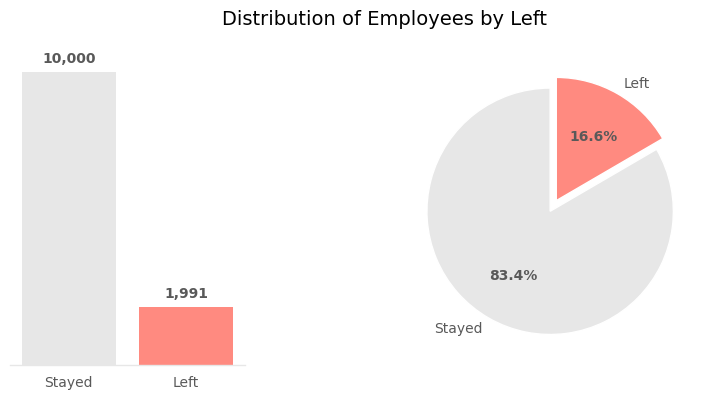

In [32]:
# Visualize the distribution of employees (count and proportion)
visualize_dist_cat(df_eda, "left", label_dict={0: "Stayed", 1: "Left"}, colors=["#E7E7E7", "#FF8A80"], explodes=[0, 0.1], value_colors=["#595959", "#595959"])

The distribution plots show that every sixth employee has left the company. We also note that there is a *moderate* class imbalance in the `left`column—10,000 (83.4%) employees stayed and 1,991 (16.6%) employees left—which may require class rebalancing if it negatively affects model performance.

##### `accident`

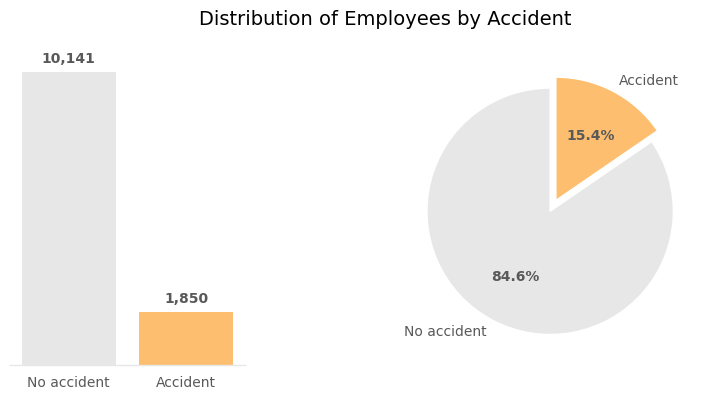

In [33]:
# Visualize the distribution of employees (count and proportion)
visualize_dist_cat(df_eda, "accident", label_dict={0: "No accident", 1: "Accident"}, colors=["#E7E7E7", "#FDBF6F"], explodes=[0, 0.1], value_colors=["#595959", "#595959"])

Around one in six or seven employees (15.4%) have had an accident at Salifort Motors. Fortunately, the majority of employees (84.6%) have managed to avoid accidents while at work.

##### `promoted`

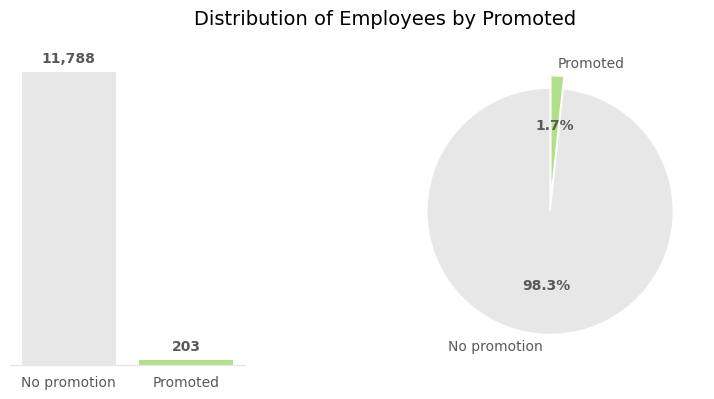

In [34]:
# Visualize the distribution of employees (count and proportion)
visualize_dist_cat(df_eda, "promoted", label_dict={0: "No promotion", 1: "Promoted"}, colors=["#E7E7E7", "#B2DF8A"], explodes=[0, 0.1], value_colors=["#595959", "#595959"])

Only 1.7% (203) of employees have received a promotion in the last five years. It appears that promotions are very rarely given at Salifort Motors.

##### `salary_level`

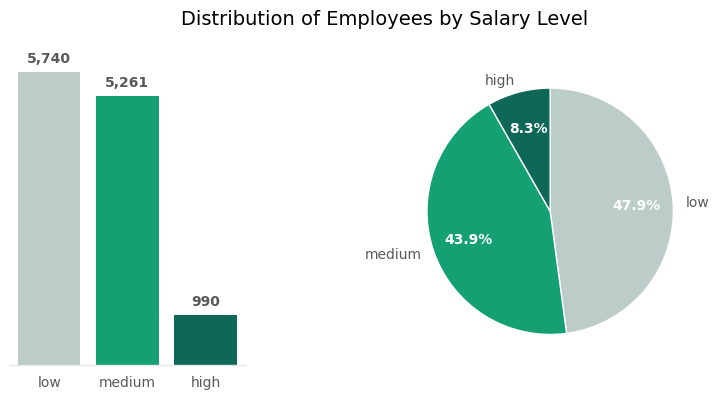

In [35]:
# Visualize the distribution of employees (count and proportion)
visualize_dist_cat(df_eda, "salary_level", colors=["#BCCCC9", "#14A073", "#0F6757"], value_distance=0.7, counterclock=False, sort_alphabetically=False)

A small portion of employees (8.3%) are paid *high* salary, while the majority of employees receive either *low* (47.9%) or *medium* (43.9%) salary.

##### `department`

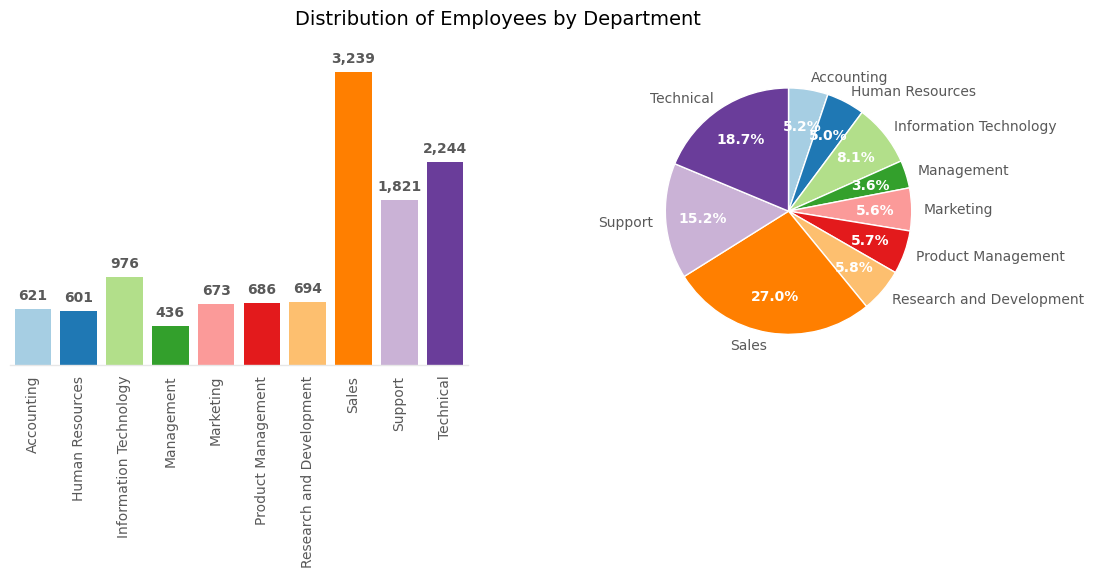

In [36]:
# Visualize the distribution of employees (count and proportion)
visualize_dist_cat(df_eda, "department", width=13, width_ratios=[1, 1], height=4, rotation=90, value_distance=0.7, counterclock=False)

More than 60% of the employees who responded to the survey are from *Sales*, *Support*, and *Technical* departments. These three departments may very well be the largest in terms of the number of employees at Salifort Motors. Other departments do not appear to be overrepresented or underrepresented in the survey data.

#### Distributions: Numeric Variables

We continue our analysis of value distributions with numeric variables, of which the first two are discrete variables: `projects`, `tenure`, `satisfaction_level`, `evaluation_score`, and `monthly_hours`.

##### `projects`

In [37]:
# Show the distribution of employees (count and proportion)
show_dist_values(df_eda, "projects")

,Count (#),Percentage (%)
projects,,
2,1582,13.2
3,3520,29.4
4,3685,30.7
5,2233,18.6
6,826,6.9
7,145,1.2


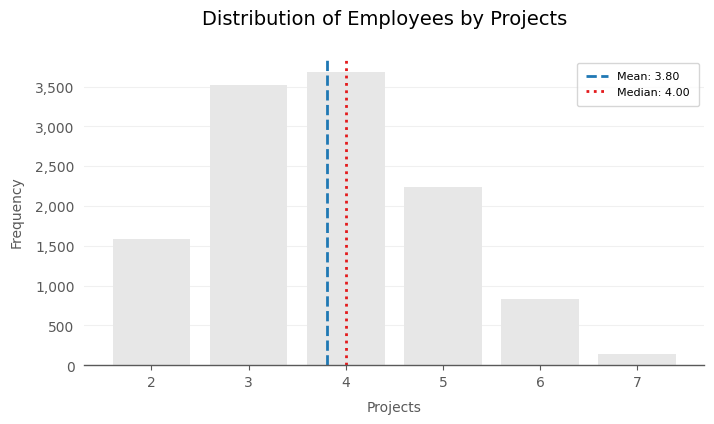

In [38]:
# Visualize the distribution of employees (histogram)
visualize_dist_num(df_eda, "projects", discrete=True)

The majority (78.7%) of employees work on three to five projects, with a median of four projects. A few employees have up to seven projects, which is probably too much in terms of workload.

##### `tenure`

In [39]:
# Show the distribution of employees (count and proportion)
show_dist_values(df_eda, "tenure")

,Count (#),Percentage (%)
tenure,,
2,2910,24.3
3,5190,43.3
4,2005,16.7
5,1062,8.9
6,542,4.5
7,94,0.8
8,81,0.7
10,107,0.9


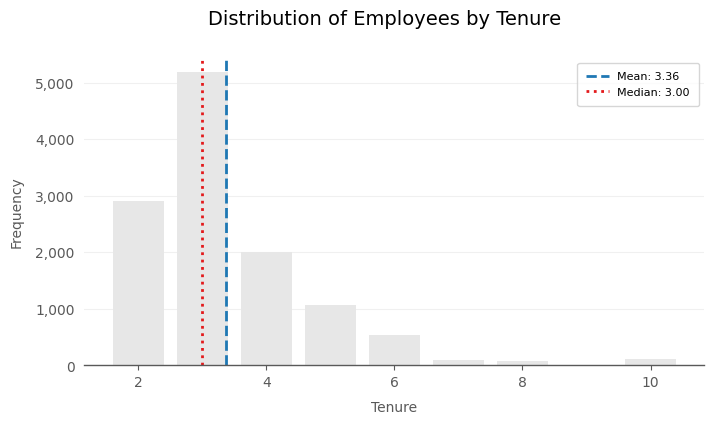

In [40]:
# Visualize the distribution of employees (histogram)
visualize_dist_num(df_eda, "tenure", discrete=True)

Salifort Motors employees have a relatively short employment history with the company; the majority (84.3%) has worked only from two to four years ($M = 3.36$, $Mdn = 3.00$). However, some employees have stayed with the company for up to ten years.

##### `satisfaction_level`

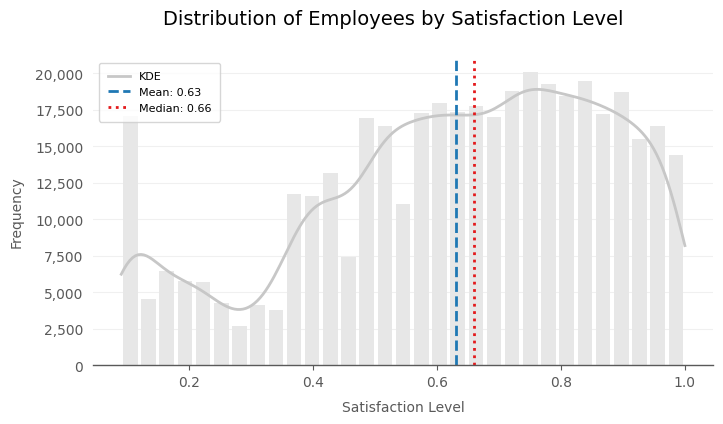

In [41]:
# Visualize the distribution of employees (histogram)
visualize_dist_num(df_eda, "satisfaction_level", discrete=False)

Salifort Motors employees are in general quite satisfied ($M = 0.63$, $Mdn = 0.66$) with their jobs. While skewed towards satisfied, there is a group of employees whose satisfaction level is extremely low (~0.1).

##### `evaluation_score`

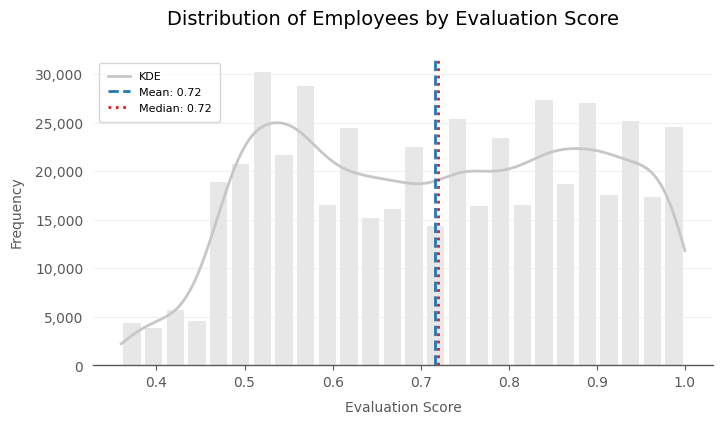

In [42]:
# Visualize the distribution of employees (histogram)
visualize_dist_num(df_eda, "evaluation_score", discrete=False)

Overall, employees also scored well ($M = 0.72$, $Mdn = 0.72$) in their last evaluation review. The evaluation scores are almost uniformly distributed from 0.5 upwards. However, there is a group of employees at ~0.4 who performed significantly worse than their peers.

##### `monthly_hours`

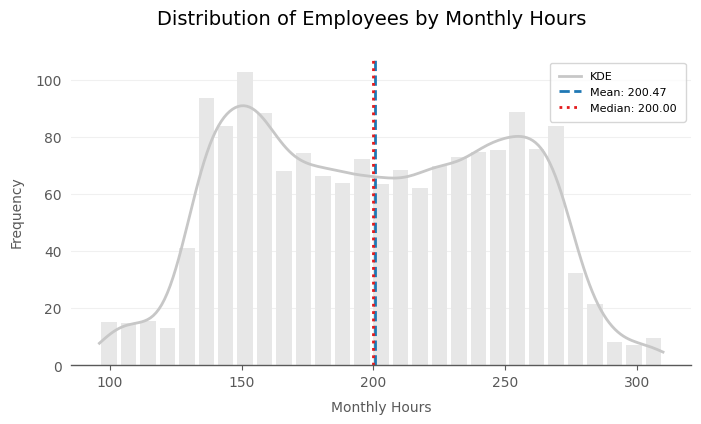

In [43]:
# Visualize the distribution of employees (histogram)
visualize_dist_num(df_eda, "monthly_hours", discrete=False)

On average, Salifort Motors employees work a whopping 200 hours per month, which is almost 50 hours more than [recommended by French law](https://www.service-public.fr/particuliers/vosdroits/F1911?lang=en). Examinating the distribution of employees' average monthly working hours shows two peaks; one at 150 and the other at 260. It seems that the workload is distributed unevenly within the company, which may be one of the reasons for employees leaving the company.

#### Distributions: Stayed vs. Left

Next, we look at each variable in more detail by comparing the groups of employees who stayed and those who left.

##### `accident`

In [44]:
# Show the distribution of employees (count and proportion)
show_dist_values_grouped(df_eda, "accident")

Count (#)  Percentage (%)
accident left                           
0        0          8255            81.4
         1          1886            18.6
1        0          1745            94.3
         1           105             5.7

Count (#)  Percentage (%)
left accident                           
0    0              8255            82.6
     1              1745            17.4
1    0              1886            94.7
     1               105             5.3

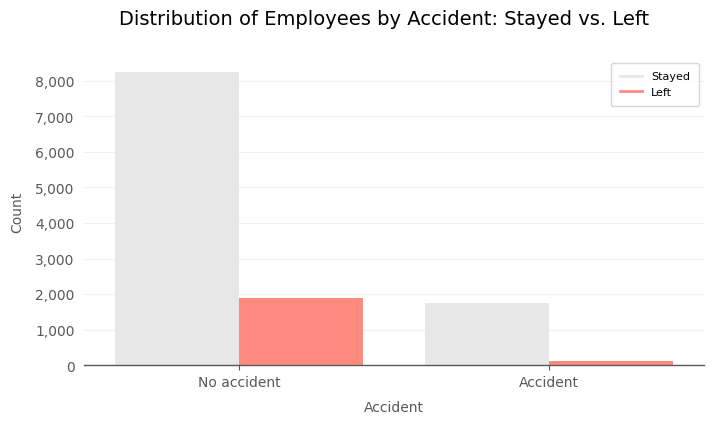

In [45]:
# Visualize the distribution of employees (count)
visualize_dist_vs(df_eda, "accident", discrete=True, label_dict={0: "No accident", 1: "Accident"})

In both groups, employees who left the company are represented as a minority and somewhat similar in size (18.6% vs. 5.7%), so `accident` is unlikely a major factor influencing employees leaving the company, rather the opposite.

##### `promoted`

In [46]:
# Show the distribution of employees (count and proportion)
show_dist_values_grouped(df_eda, "promoted")

Count (#)  Percentage (%)
promoted left                           
0        0          9805            83.2
         1          1983            16.8
1        0           195            96.1
         1             8             3.9

Count (#)  Percentage (%)
left promoted                           
0    0              9805            98.0
     1               195             2.0
1    0              1983            99.6
     1                 8             0.4

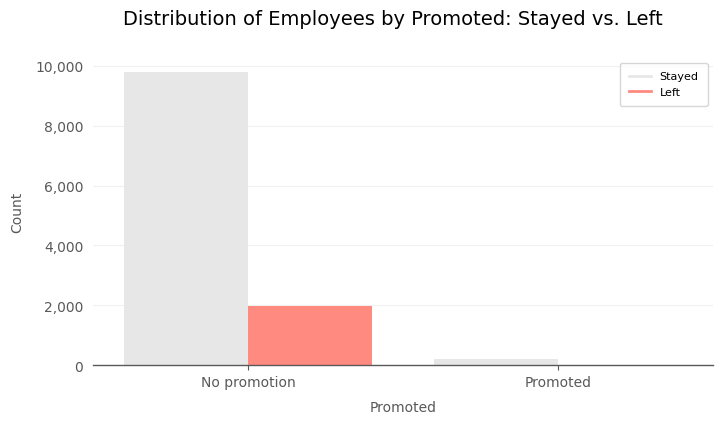

In [47]:
# Visualize the distribution of employees (count)
visualize_dist_vs(df_eda, "promoted", discrete=True, label_dict={0: "No promotion", 1: "Promoted"})

Merely 3.9% of employees who received promotions left Salifort Motors, in contrast to 16.8% of those who were not promoted and eventually left the company. This indicates that implementing promotion strategies could prove effective in engaging and retaining employees.

##### `salary_level`

In [48]:
# Show the distribution of employees (count and proportion)
show_dist_values_grouped(df_eda, "salary_level")

Count (#)  Percentage (%)
salary_level left                           
low          0          4566            79.5
             1          1174            20.5
medium       0          4492            85.4
             1           769            14.6
high         0           942            95.2
             1            48             4.8

Count (#)  Percentage (%)
left salary_level                           
0    low                4566            45.7
     medium             4492            44.9
     high                942             9.4
1    low                1174            59.0
     medium              769            38.6
     high                 48             2.4

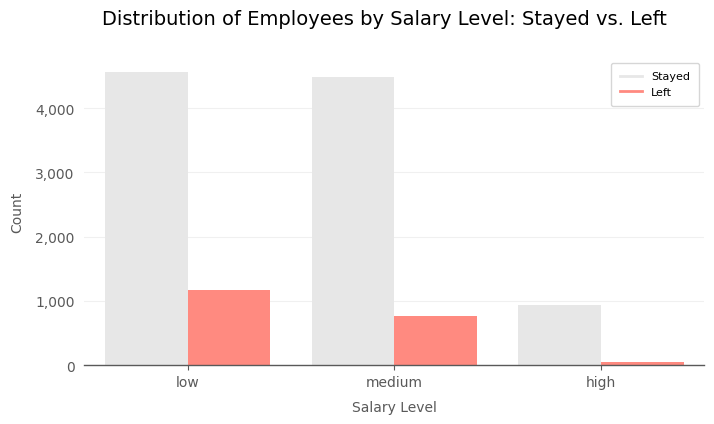

In [49]:
# Visualize the distribution of employees (count)
visualize_dist_vs(df_eda, "salary_level", discrete=True)

The examination of `salary_level` reveals a positive correlation between higher salary levels and increased employee commitment. Considering this relationship, Salifort Motors may want to explore the option of giving salary raises as a strategic approach to enhance employee retention.

##### `department`

In [50]:
# Show the distribution of employees (count and proportion)
show_dist_values_grouped(df_eda, "department")

Count (#)  Percentage (%)
department               left                           
Information Technology   0           818            83.8
                         1           158            16.2
Research and Development 0           609            87.8
                         1            85            12.2
Accounting               0           512            82.4
                         1           109            17.6
Human Resources          0           488            81.2
                         1           113            18.8
Management               0           384            88.1
                         1            52            11.9
Marketing                0           561            83.4
                         1           112            16.6
Product Management       0           576            84.0
                         1           110            16.0
Sales                    0          2689            83.0
                         1           550            17.0
Support                  0          1509            82.9
                         1           312            17.1
Technical                0          1854            82.6
                         1           390            17.4

Count (#)  Percentage (%)
left department                                         
0    Information Technology          818             8.2
     Research and Development        609             6.1
     Accounting                      512             5.1
     Human Resources                 488             4.9
     Management                      384             3.8
     Marketing                       561             5.6
     Product Management              576             5.8
     Sales                          2689            26.9
     Support                        1509            15.1
     Technical                      1854            18.5
1    Information Technology          158             7.9
     Research and Development         85             4.3
     Accounting                      109             5.5
     Human Resources                 113             5.7
     Management                       52             2.6
     Marketing                       112             5.6
     Product Management              110             5.5
     Sales                           550            27.6
     Support                         312            15.7
     Technical                       390            19.6

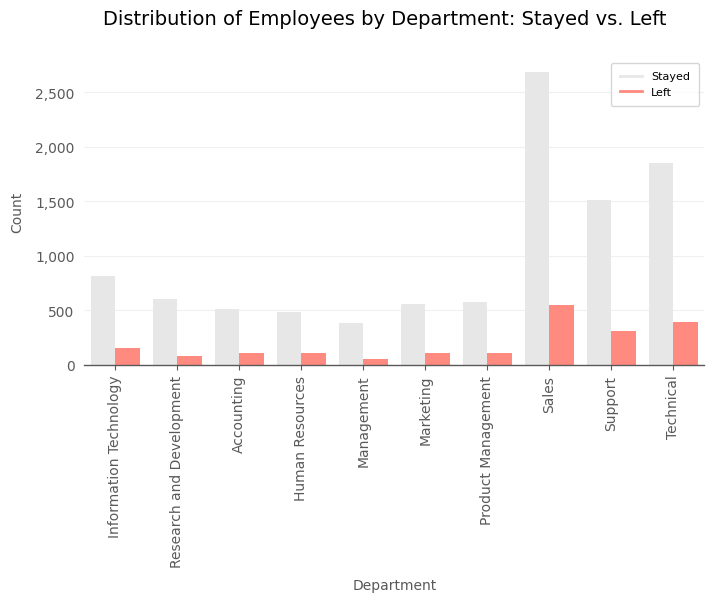

In [51]:
# Visualize the distribution of employees (count)
visualize_dist_vs(df_eda, "department", discrete=True, rotation=90)

The attrition rate remains relatively stable, fluctuating between 11.9% and 18.8% across different departments. Notably, employees in the *Management* and *Research and Development* departments exhibit the highest retention rates, while the *Human Resources* department experiences the highest turnover.

##### `projects`

In [52]:
# Show mean and median
show_mean_median_grouped(df_eda, "projects")

,Mean,Median
left,,
0,3.786800,4.0
1,3.883476,4.0


In [53]:
# Show the distribution of employees (count and proportion)
show_dist_values_grouped(df_eda, "projects")

Count (#)  Percentage (%)
projects left                           
2        0           725            45.8
         1           857            54.2
3        0          3482            98.9
         1            38             1.1
4        0          3448            93.6
         1           237             6.4
5        0          1890            84.6
         1           343            15.4
6        0           455            55.1
         1           371            44.9
7        1           145           100.0

Count (#)  Percentage (%)
left projects                           
0    2               725             7.2
     3              3482            34.8
     4              3448            34.5
     5              1890            18.9
     6               455             4.6
1    2               857            43.0
     3                38             1.9
     4               237            11.9
     5               343            17.2
     6               371            18.6
     7               145             7.3

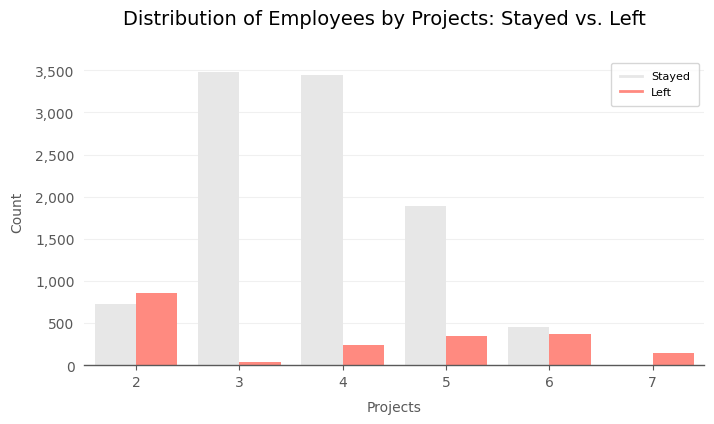

In [54]:
# Visualize the distribution of employees (count)
visualize_dist_vs(df_eda, "projects", discrete=True)

Upon examining the distribution, it becomes evident that three to five projects per employee is the ideal number to keep them engaged. However, for some reason, the majority of employees who worked on only two projects opted to leave the company.

##### `tenure`

In [55]:
# Show mean and median
show_mean_median_grouped(df_eda, "tenure")

,Mean,Median
left,,
0,3.262000,3.0
1,3.881467,4.0


In [56]:
# Show the distribution of employees (count and proportion)
show_dist_values_grouped(df_eda, "tenure")

Count (#)  Percentage (%)
tenure left                           
2      0          2879            98.9
       1            31             1.1
3      0          4316            83.2
       1           874            16.8
4      0          1510            75.3
       1           495            24.7
5      0           580            54.6
       1           482            45.4
6      0           433            79.9
       1           109            20.1
7      0            94           100.0
8      0            81           100.0
10     0           107           100.0

Count (#)  Percentage (%)
left tenure                           
0    2            2879            28.8
     3            4316            43.2
     4            1510            15.1
     5             580             5.8
     6             433             4.3
     7              94             0.9
     8              81             0.8
     10            107             1.1
1    2              31             1.6
     3             874            43.9
     4             495            24.9
     5             482            24.2
     6             109             5.5

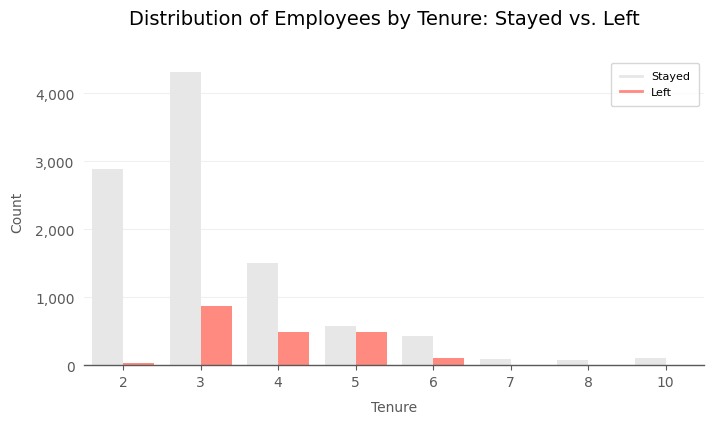

In [57]:
# Visualize the distribution of employees (count)
visualize_dist_vs(df_eda, "tenure", discrete=True)

A significant proportion of employees leave Salifort Motors within three to six years of joining the company. Maybe this correlates with one or more variables, such as `promoted`? Potential correlations will be explored shortly.

##### `satisfaction_level`

In [58]:
# Show mean and median
show_mean_median_grouped(df_eda, "satisfaction_level")

,Mean,Median
left,,
0,0.667365,0.69
1,0.440271,0.41


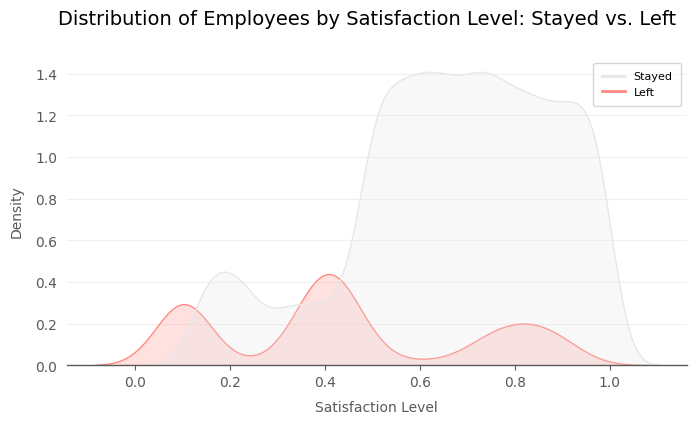

In [59]:
# Visualize the distribution of employees (density)
visualize_dist_vs(df_eda, "satisfaction_level", discrete=False)

Those employees who chose to stay at Salifort Motors exhibit a higher level of job satisfaction ($M = 0.67$, $Mdn = 0.69$) in contrast to their counterparts who left ($M = 0.44$, $Mdn = 0.41$). Further, the distribution of employees who left reveals three peaks at 0.1, 0.4, and 0.8, suggesting that dissatisfaction alone may not be the sole contributing factor to employee turnover.

##### `evaluation_score`

In [60]:
# Show mean and median
show_mean_median_grouped(df_eda, "evaluation_score")

,Mean,Median
left,,
0,0.715667,0.71
1,0.721783,0.79


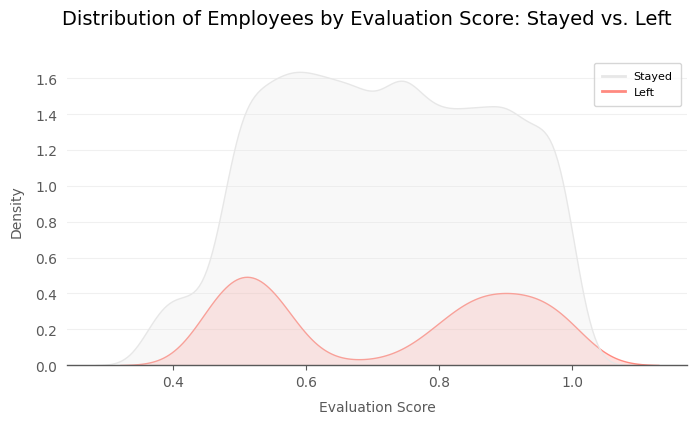

In [61]:
# Visualize the distribution of employees (density)
visualize_dist_vs(df_eda, "evaluation_score", discrete=False)

Interestingly, employees who left ($M = 0.72$, $Mdn = 0.79$) demonstrated comparable or slightly better performance than those who decided to stay ($M = 0.72$, $Mdn = 0.71$) at Salifort Motors. The data visualization shows two distinct groups among left employees: one performing below the average and the other surpassing expectations.

##### `monthly_hours`

In [62]:
# Show mean and median
show_mean_median_grouped(df_eda, "monthly_hours")

,Mean,Median
left,,
0,198.94270,198.0
1,208.16223,226.0


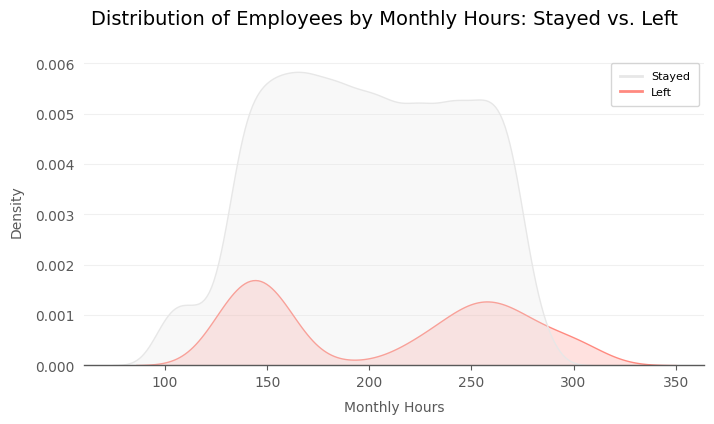

In [63]:
# Visualize the distribution of employees (density)
visualize_dist_vs(df_eda, "monthly_hours", discrete=False)

Both groups of employees, whether they stayed ($M = 198.9$, $Mdn = 198$) or left ($M = 208.2$, $Mdn = 226$), tend to work a lot of overtime. There is a notable difference in workload distribution between the groups, though. The distribution of workload is more balanced in the group that stayed at the company. Conversely, those who left can be segmented into two subgroups: one working below the average and the other taking on a significantly higher workload.

#### Correlation Heatmaps

The preceding analysis suggested that certain variables may be related to each other. To unveil these relationships, if any, we compute and visualize pairwise correlations of the variables, excluding `department`.

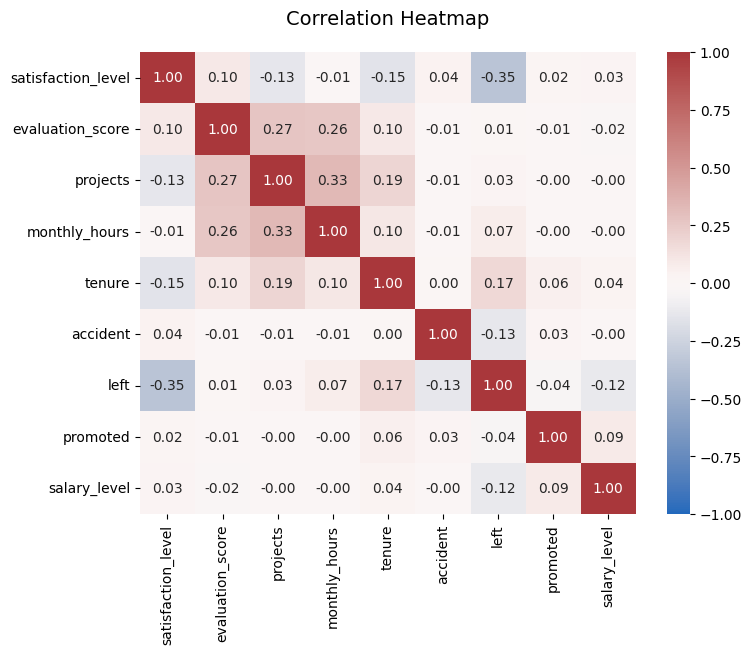

In [64]:
# Visualize the correlation of variables (heatmap)
visualize_corr_hm(df_eda, drop_columns=["department"])

The correlation heatmap confirms that among *all employees*, `evaluation_score`, `monthly_hours`, and `projects` have some positive correlation with each other, whereas `satisfaction_level` negative correlates with `left`. Surprisingly, `promoted` does not correlate with `left` almost at all.

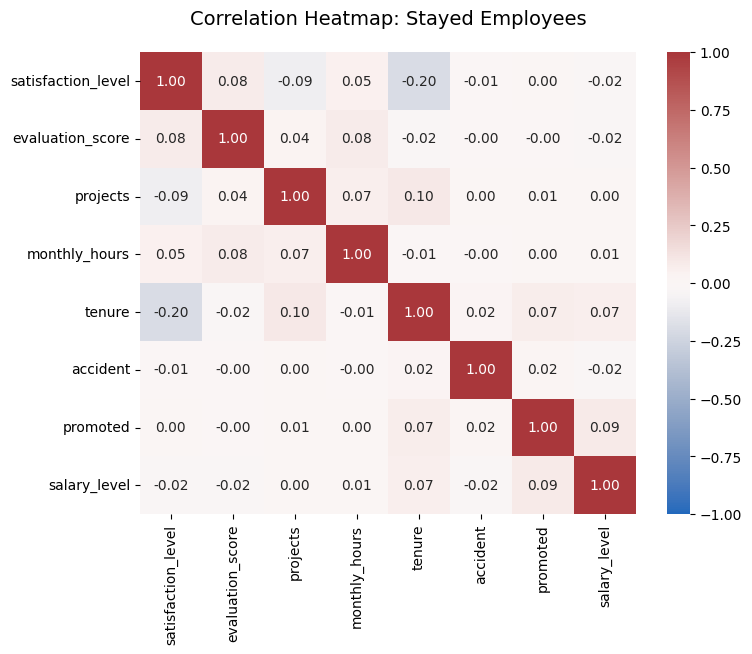

In [65]:
# Visualize the correlation of variables (heatmap)
visualize_corr_hm(df_eda, drop_columns=["department"], filter_column="left", filter_value=0, subtitle="Stayed Employees")

There are no significant correlations between the variables among employees who stayed at the company.

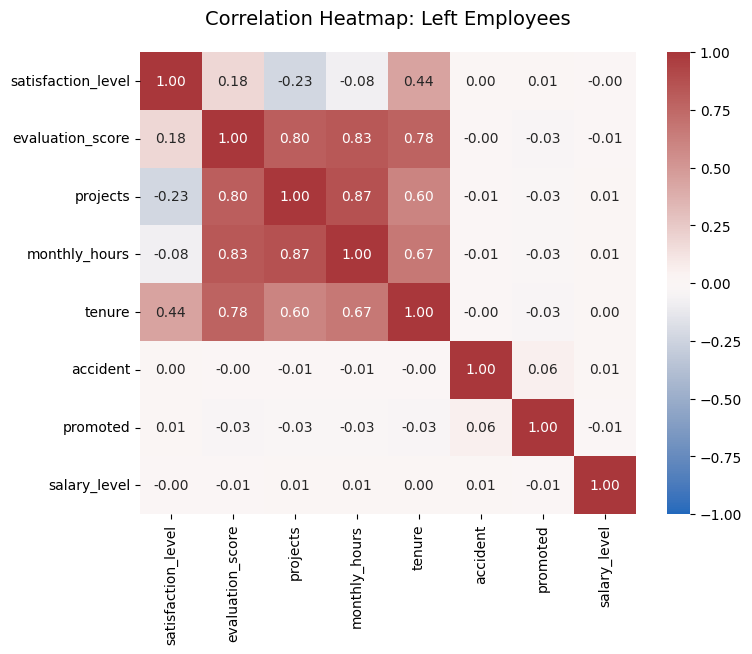

In [66]:
# Visualize the correlation of variables (heatmap)
visualize_corr_hm(df_eda, drop_columns=["department"], filter_column="left", filter_value=1, subtitle="Left Employees")

There is a very strong positive correlation between the following variables among employees who left the company: `evaluation_score`, `tenure`, `monthly_hours`, and `projects`. In addition, `satisfaction_level` and `tenure` positively correlate with each other, whereas `projects` and `satisfaction_level` are negatively correlated.

#### Pairwise Relationships: Stayed vs. Left

We further explore pairwise relationships by generating visualizations that distinguish between those who stayed with the company and those who left.

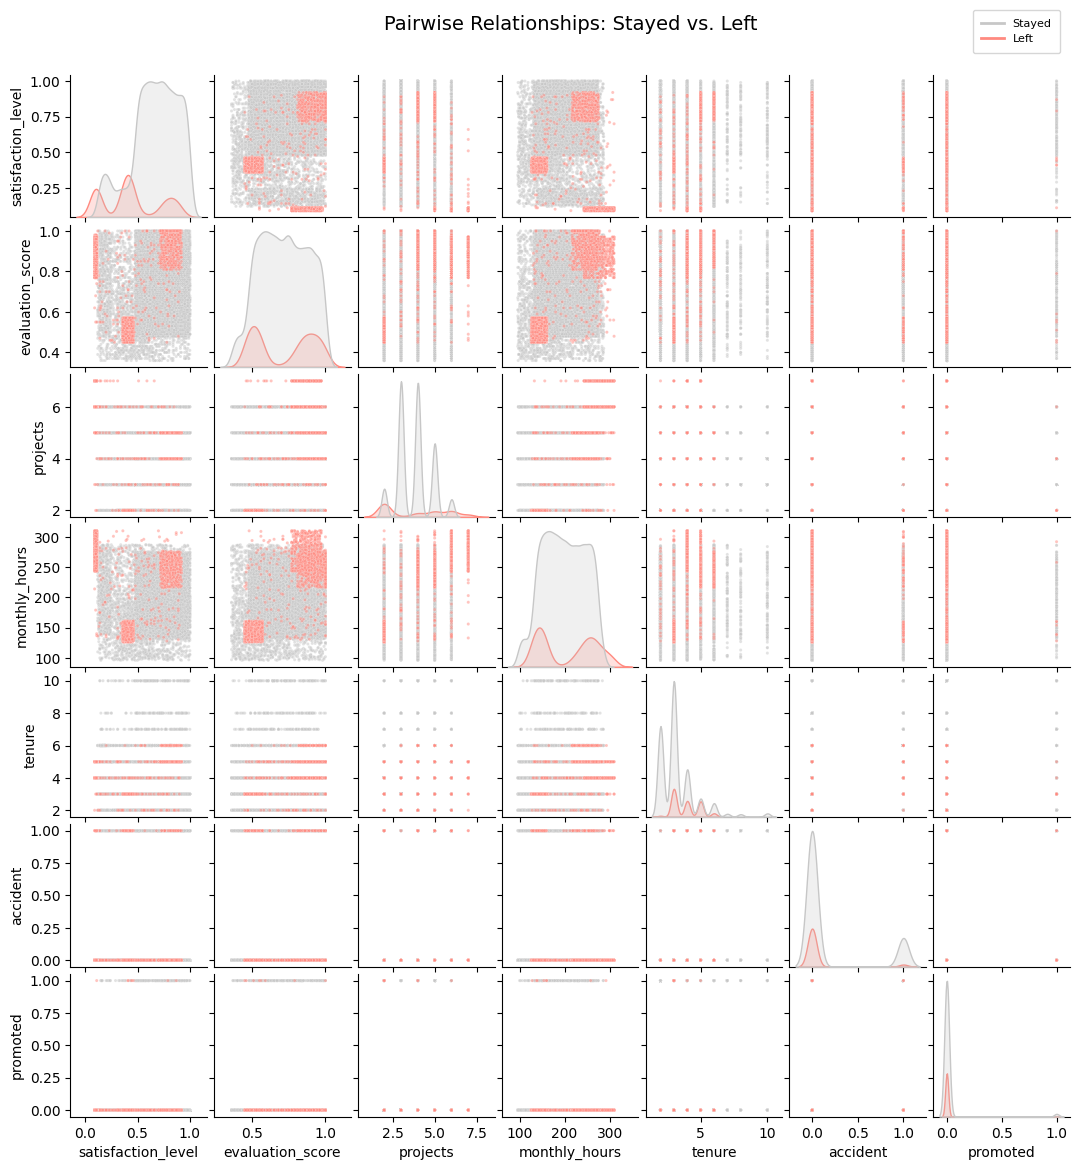

In [67]:
# Visualize pairwise relationships (left employees on top)
visualize_corr_pr(df_eda)

##### `satisfaction_level`

In [68]:
# Group 1
mask_sl_group1 = (df_eda["left"] == 1) & (df_eda["satisfaction_level"] >= 0.0) & (df_eda["satisfaction_level"] < 0.25)
display(round(df_eda[mask_sl_group1].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,528.0,0.105,0.019,0.09,0.10,0.10,0.11,0.24
evaluation_score,528.0,0.862,0.082,0.46,0.81,0.87,0.92,1.00
projects,528.0,6.142,0.703,2.00,6.00,6.00,7.00,7.00
monthly_hours,528.0,272.680,28.339,135.00,257.00,275.50,292.00,310.00
tenure,528.0,4.089,0.411,2.00,4.00,4.00,4.00,6.00
accident,528.0,0.053,0.224,0.00,0.00,0.00,0.00,1.00
left,528.0,1.000,0.000,1.00,1.00,1.00,1.00,1.00
promoted,528.0,0.002,0.044,0.00,0.00,0.00,0.00,1.00


In [69]:
# Group 2
mask_sl_group2 = (df_eda["left"] == 1) & (df_eda["satisfaction_level"] >= 0.25) & (df_eda["satisfaction_level"] < 0.6)
display(round(df_eda[mask_sl_group2].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,911.0,0.411,0.042,0.25,0.38,0.41,0.44,0.59
evaluation_score,911.0,0.530,0.086,0.45,0.48,0.51,0.55,1.00
projects,911.0,2.194,0.755,2.00,2.00,2.00,2.00,7.00
monthly_hours,911.0,150.083,28.221,126.00,135.00,145.00,154.00,310.00
tenure,911.0,3.074,0.425,2.00,3.00,3.00,3.00,6.00
accident,911.0,0.053,0.224,0.00,0.00,0.00,0.00,1.00
left,911.0,1.000,0.000,1.00,1.00,1.00,1.00,1.00
promoted,911.0,0.005,0.074,0.00,0.00,0.00,0.00,1.00


In [70]:
# Group 3
mask_sl_group3 = (df_eda["left"] == 1) & (df_eda["satisfaction_level"] >= 0.6) & (df_eda["satisfaction_level"] <= 1.0)
display(round(df_eda[mask_sl_group3].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,552.0,0.810,0.068,0.60,0.76,0.82,0.87,0.92
evaluation_score,552.0,0.905,0.093,0.45,0.86,0.92,0.98,1.00
projects,552.0,4.511,0.715,2.00,4.00,5.00,5.00,7.00
monthly_hours,552.0,242.301,27.430,128.00,229.75,246.00,260.00,310.00
tenure,552.0,5.016,0.746,2.00,5.00,5.00,5.00,6.00
accident,552.0,0.053,0.223,0.00,0.00,0.00,0.00,1.00
left,552.0,1.000,0.000,1.00,1.00,1.00,1.00,1.00
promoted,552.0,0.004,0.060,0.00,0.00,0.00,0.00,1.00


The distribution of satisfaction level by left employees shows three distinct peaks at 0.1, 0.4, and 0.8. These peaks align with specific clusters in the `evaluation_score` and `monthly_hours` variables. Group 1, characterized by extremetely low satisfaction levels, consists of high-performing individuals who worked a lot of overtime and were involved in many projects without ever receiving a promotion. It is plausible that they voluntarily resigned due to years of excessive workload, gradually diminishing their job satisfation. Employees in group 2 exhibit below-average working hours and performance, coupled with only a few projects, suggesting that they were recently fired from the company. The last group of employees comprises senior employees who not only exhibit high job satisfaction and excellent performance but also displayed strong work ethic. However, the minimal promotion rate may have led to their decision to leave the company.

##### `evaluation_score`

In [71]:
# Group 1
mask_es_group1 = (df_eda["left"] == 1) & (df_eda["evaluation_score"] >= 0.3) & (df_eda["evaluation_score"] < 0.7)
display(round(df_eda[mask_es_group1].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,904.0,0.411,0.072,0.09,0.38,0.41,0.44,0.89
evaluation_score,904.0,0.515,0.042,0.45,0.48,0.51,0.55,0.68
projects,904.0,2.185,0.763,2.00,2.00,2.00,2.00,7.00
monthly_hours,904.0,149.904,27.823,126.00,135.00,145.00,154.00,310.00
tenure,904.0,3.071,0.390,2.00,3.00,3.00,3.00,6.00
accident,904.0,0.054,0.227,0.00,0.00,0.00,0.00,1.00
left,904.0,1.000,0.000,1.00,1.00,1.00,1.00,1.00
promoted,904.0,0.007,0.081,0.00,0.00,0.00,0.00,1.00


In [72]:
# Group 2
mask_es_group2 = (df_eda["left"] == 1) & (df_eda["evaluation_score"] >= 0.7) & (df_eda["evaluation_score"] <= 1.0)
display(round(df_eda[mask_es_group2].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1087.0,0.465,0.351,0.09,0.10,0.54,0.82,0.92
evaluation_score,1087.0,0.894,0.070,0.70,0.84,0.89,0.95,1.00
projects,1087.0,5.296,1.080,2.00,5.00,5.00,6.00,7.00
monthly_hours,1087.0,256.613,32.650,130.00,243.00,259.00,276.00,310.00
tenure,1087.0,4.556,0.781,2.00,4.00,5.00,5.00,6.00
accident,1087.0,0.052,0.221,0.00,0.00,0.00,0.00,1.00
left,1087.0,1.000,0.000,1.00,1.00,1.00,1.00,1.00
promoted,1087.0,0.002,0.043,0.00,0.00,0.00,0.00,1.00


The distribution of evaluation score has two distinct peaks at 0.5 and 0.9, which correlate with the clusters in the `satisfaction_level` and `monthly_hours` columns. Group 1 corresponds to group 2 in `satisfaction_level`, while group 2 combines groups 1 and 3 due to overlapping values.

##### `monthly_hours`

In [73]:
# Group 1
mask_mh_group1 = (df_eda["left"] == 1) & (df_eda["monthly_hours"] >= 100) & (df_eda["monthly_hours"] < 200)
display(round(df_eda[mask_mh_group1].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,910.0,0.419,0.084,0.10,0.38,0.41,0.44,0.9
evaluation_score,910.0,0.533,0.093,0.45,0.48,0.51,0.55,1.0
projects,910.0,2.196,0.756,2.00,2.00,2.00,2.00,7.0
monthly_hours,910.0,144.952,12.153,126.00,135.00,145.00,154.00,199.0
tenure,910.0,3.074,0.422,2.00,3.00,3.00,3.00,6.0
accident,910.0,0.054,0.226,0.00,0.00,0.00,0.00,1.0
left,910.0,1.000,0.000,1.00,1.00,1.00,1.00,1.0
promoted,910.0,0.007,0.081,0.00,0.00,0.00,0.00,1.0


In [74]:
# Group 2
mask_mh_group2 = (df_eda["left"] == 1) & (df_eda["monthly_hours"] >= 200)
display(round(df_eda[mask_mh_group2].describe().T, 3))

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1081.0,0.459,0.351,0.09,0.10,0.44,0.81,0.92
evaluation_score,1081.0,0.881,0.095,0.45,0.84,0.89,0.95,1.00
projects,1081.0,5.304,1.087,2.00,5.00,5.00,6.00,7.00
monthly_hours,1081.0,261.374,24.449,202.00,245.00,260.00,278.00,310.00
tenure,1081.0,4.562,0.765,2.00,4.00,5.00,5.00,6.00
accident,1081.0,0.052,0.222,0.00,0.00,0.00,0.00,1.00
left,1081.0,1.000,0.000,1.00,1.00,1.00,1.00,1.00
promoted,1081.0,0.002,0.043,0.00,0.00,0.00,0.00,1.00


As above, the distribution of monthly hours shows two peaks, of which the former corresponds to group 2 in `satisfaction_level` and the latter combines groups 1 and 3 due to overlapping values.

### 2.7 Key Insights

- **Employee turnover is a significant issue at Salifort Motors, with an attrition rate of 16.6%.** This is likely due to a number of factors, including high workloads, low job satisfaction, and a lack of promotions.
- **Employees who work on three to five projects are most likely to be engaged and satisfied with their jobs.** This suggests that Salifort Motors should aim to distribute projects more evenly among employees.
- **Employees who receive promotions are less likely to leave the company than those who do not.** This suggests that Salifort Motors should implement promotion strategies to improve employee retention.
- **Employees who leave the company are more likely to have high evaluation scores and work long hours than those who stay.** This suggests that Salifort Motors may be losing some of its best employees due to burnout or a lack of promotions.
- **There are three distinct groups of employees who left the company: (i) those who were dissatisfied and overworked, (ii) those who were underperforming, and (iii) those who were high-performing but not promoted despite a long career.** Salifort Motors should address the needs of each of these groups to improve employee retention.

---
## 3 Feature Engineering

Feature engineering plays a pivotal role in machine learning, encompassing a series of techniques such as feature selection, transformation, and extraction to prepare data for modeling. The primary objective of this process is to optimize the model for enhanced performance, adaptability, and accuracy, among other things. By strategically crafting and refining features based on domain knowledge and EDA insights, machine learning algorithms can better discern patterns within the data, leading to more robust and precise predictive models.

In [75]:
# Copy the dataframe and reset index
df_fe = df_eda.copy()
df_fe = df_fe.reset_index(drop=True)

### 3.1 Feature Selection

Feature selection is the process of choosing columns from our dataset to be used as predictor variables in data modeling. At this stage, we still consider all columns to be relevant (i.e., predictive or interactive features), because (i) the dataset does not contain any columns with irrelevant metadata like an ID number and (ii) the most popular classification models suitable for this type of task can capture complex, nonlinear relationships between predictor variables and the target variable (`left`). We will revisit feature selection later in the data modeling process.

### 3.2 Feature Transformation

In this step, we transform our features to make them more suitable for modeling. Classification models generally need categorical variables to be encoded. Since our dataset has two categorical variables, `salary_level` with ordinal values and `department` with nominal values, we will use different kind of encoding techniques to convert them into numerical data.

In [76]:
# Encode salary_level (ordinal values)
df_fe["salary_level"] = df_fe["salary_level"].cat.codes

# Encode department (nominal values)
df_fe = pd.get_dummies(df_fe, columns=["department"], drop_first=False, dtype=int)

# Verify changes in data types
df_fe.dtypes

satisfaction_level                     float64
evaluation_score                       float64
projects                                 int64
monthly_hours                            int64
tenure                                   int64
accident                                 int64
left                                     int64
promoted                                 int64
salary_level                              int8
department_Information Technology        int64
department_Research and Development      int64
department_Accounting                    int64
department_Human Resources               int64
department_Management                    int64
department_Marketing                     int64
department_Product Management            int64
department_Sales                         int64
department_Support                       int64
department_Technical                     int64
dtype: object

### 3.3 Feature Extraction

Feature extraction involves creating new features from one or more other features, with the goal of improving the predictive power of the model. Leveraging our domain knowledge, we will introduce three new features: `overtime`, `workload`, and `stress_level`.

In [77]:
# Create overtime variable
df_fe["overtime"] = np.where(df_fe["monthly_hours"] > 151.67, 1, 0)  # recommended by French law

# Create workload variable
df_fe["workload"] = df_fe["monthly_hours"] * np.sqrt(df_fe["projects"])

# Create stress_level variable
df_fe["stress_level"] = df_fe["workload"] / df_fe["satisfaction_level"]

# Create productivity_score variable
#df_fe["productivity_score"] = df_fe["workload"] * np.sqrt(df_fe["tenure"]) * df_fe["evaluation_score"]

# Display the first 10 rows
df_fe.head(10)

,satisfaction_level,evaluation_score,projects,monthly_hours,tenure,accident,left,promoted,salary_level,department_Information Technology,department_Research and Development,department_Accounting,department_Human Resources,department_Management,department_Marketing,department_Product Management,department_Sales,department_Support,department_Technical,overtime,workload,stress_level
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,222.031529,584.293498
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,585.849810,732.312263
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,719.644357,6542.221424
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,498.643159,692.559943
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,224.859956,607.729612
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,216.374675,527.743110
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,605.023966,6050.239665
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,579.141606,629.501746
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,500.879227,562.785648
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,200.818326,478.138871


---
## 4 Data Modeling

In this last step, we will construct several machine learning models to predict employee attrition using the features from our HR dataset, including those engineered above. Below is a summary of the considerations and decisions made before modeling:

- **Modeling objective:** To predict whether or not an employee will leave Salifort Motors.
- **Machine learning task:** Classification (supervised learning), with two categories. We will use tree-based classification algorithms—`Decision Tree`, `Random Forest`, `XGBoost`—to model our data, as they are known to suit well for this type of task and offer a compelling combination of high accuracy and interpretability.
- **Target variable:** The `left` column (0 = stayed, 1 = left).
- **Class balance:** The target variable is only *moderately* imbalanced (83.4% stayed vs. 16.6% left), so there is no immediate need to rebalance the data.
- **Primary evaluation metric:** The *recall* score, because we want to identify as many true responders (employees who are about to leave) as possible and the risks involved in making a false positive prediction are low.
- **Modeling workflow:** We follow a rigorous, three-step approach to model development: model building (training), model selection (validation), and model evaluation (test). Only the champion model, determined by achieving the highest *recall* score on the validation data, is used to predict on the test data to get a truly objective measure of future performance.

In [78]:
# Copy the dataframe and reset index
df_dm = df_fe.copy()
df_dm = df_dm.reset_index(drop=True)

In [79]:
# Define the models' metadata
model_metadata_dict = {
    "dt1": {
        "abbreviation": "dt",
        "name": "Decision Tree",
        "version": 1,
        "param_grid": {
            "clf__max_depth": [2, 3, 5, 8, None],  # best parameter: 8
            "clf__min_samples_leaf": [1, 2, 5, 10],  # best parameter: 1
            "clf__min_samples_split": [2, 5, 10],  # best parameter: 2
        },
    },
    "dt2": {
        "abbreviation": "dt",
        "name": "Decision Tree",
        "version": 2,
        "param_grid": {
            "clf__max_depth": [2, 3, 5, 8, None],  # best parameter: 8
            "clf__min_samples_leaf": [1, 2, 5, 10],  # best parameter: 1
            "clf__min_samples_split": [2, 5, 10],  # best parameter: 2
        },
    },
    "rf1": {
        "abbreviation": "rf",
        "name": "Random Forest",
        "version": 1,
        "param_grid": {
            "clf__max_depth": [3, 5, 8, None],  # best parameter: 8
            "clf__max_features": [2, 5, "sqrt", None],  # best parameter: None
            "clf__max_samples": [0.5, 0.8, None],  # best parameter: None
            "clf__min_samples_leaf": [1, 2, 5, 10],  # best parameter: 1
            "clf__min_samples_split": [2, 5, 10],  # best parameter: 2
            "clf__n_estimators": [10, 25, 50, 100, 300, 500],  # best parameter: 25
        },
    },
    "rf2": {
        "abbreviation": "rf",
        "name": "Random Forest",
        "version": 2,
        "param_grid": {
            "clf__max_depth": [3, 5, 8, None],  # best parameter: 8
            "clf__max_features": [2, 5, "sqrt", None],  # best parameter: None
            "clf__max_samples": [0.5, 0.8, None],  # best parameter: None
            "clf__min_samples_leaf": [1, 2, 5, 10],  # best parameter: 1
            "clf__min_samples_split": [2, 5, 10],  # best parameter: 5
            "clf__n_estimators": [10, 25, 50, 100, 300, 500],  # best parameter: 25
        },
    },
    "xgb1": {
        "abbreviation": "xgb",
        "name": "XGBoost",
        "version": 1,
        "param_grid": {
            "clf__colsample_bytree": [0.5, 0.7, 0.9, 1.0],  # best parameter: 0.9
            "clf__learning_rate": [0.1, 0.3, 0.9],  # best parameter: 0.3
            "clf__max_depth": [2, 3, 5, 8],  # best parameter: 2
            "clf__min_child_weight": [0.1, 0.5, 1],  # best parameter: 0.1
            "clf__n_estimators": [10, 25, 50, 100, 300, 500],  # best parameter: 300
            "clf__subsample": [0.5, 0.9, 1.0],  # best parameter: 1.0
        },
    },
    "xgb2": {
        "abbreviation": "xgb",
        "name": "XGBoost",
        "version": 2,
        "param_grid": {
            "clf__colsample_bytree": [0.5, 0.7, 0.9, 1.0],  # best parameter: 0.5
            "clf__learning_rate": [0.1, 0.3, 0.9],  # best parameter: 0.3
            "clf__max_depth": [2, 3, 5, 8],  # best parameter: 2
            "clf__min_child_weight": [0.1, 0.5, 1],  # best parameter: 0.5
            "clf__n_estimators": [10, 25, 50, 100, 300, 500],  # best parameter: 500
            "clf__subsample": [0.5, 0.9, 1.0],  # best parameter: 1.0
        },
    },
}

### 4.1 Split the Data

We start by isolating the predictor variables (`X`) and the target variable (`y`). Subsequently, the dataset is split using stratified sampling into three distinct sets—training (60%), validation (20%), and test (20%)—each serving a specific purpose. The training data is employed for model fitting and tuning hyperparameters, the validation data facilitates model comparison, and the test data is reserved for the evaluation of the champion model.

In [80]:
# Select predictor (X) variables
X = df_dm.drop(["left"], axis=1)

# Select target (y) variable
y = df_dm["left"]

# Split into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

# Verify set sizes
print(f"Training set:   {len(X_tr)/len(X):.2%} {X_tr.shape} & {y_tr.shape}")
print(f"Validation set: {len(X_val)/len(X):.2%} {X_val.shape} & {y_val.shape}")
print(f"Test set:       {len(X_test)/len(X):.2%} {X_test.shape} & {y_test.shape}")

Training set:   59.99% (7194, 21) & (7194,)
Validation set: 20.00% (2398, 21) & (2398,)
Test set:       20.01% (2399, 21) & (2399,)


### 4.2 Model Building

#### Iteration Round 1

Next, we will build three baseline (version 1) classification models, `Decision Tree v1`, `Random Forest v1`, and `XGBoost v1`, each leveraging all available features and using a cross-validated grid search for tuning hyperparameters.

##### Decision Tree v1

[Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) is a simple and interpretable machine learning algorithm that makes predictions by recursively splitting data into subsets based on the most informative features, resulting in a tree-like structure of decisions. Despite their strengths, decision trees have a few notable drawbacks, such as a tendency to overfitting and sensitivity to small changes in the training data.

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best score: 0.9146443514644351
Best parameters: {'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


,Model,Accuracy,Precision,Recall,F1
0,Decision Tree v1 (Training),0.978,0.9517,0.9146,0.9326


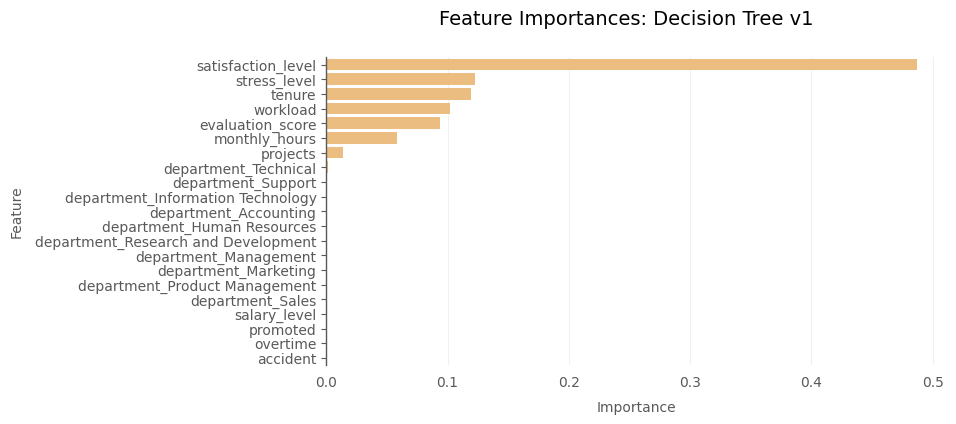

CPU times: user 1.05 s, sys: 259 ms, total: 1.31 s
Wall time: 10.1 s


In [81]:
%%time

# Build tuned model (pipeline)
dt1_model: Pipeline = build_tuned_model(model_metadata_dict["dt1"], DecisionTreeClassifier(random_state=42), X_tr, y_tr)

##### Random Forest v1

[Random Forest](https://en.wikipedia.org/wiki/Random_forest) is an ensemble learning method based on bagging and random feature sampling. It surpasses individual decision trees by building multiple decision trees in parallel and aggregating their predictions to make a final prediction, thereby enhancing accuracy, reducing overfitting, and providing a more robust and versatile model.

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best score: 0.9129707112970712
Best parameters: {'clf__max_depth': 8, 'clf__max_features': None, 'clf__max_samples': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 25}


,Model,Accuracy,Precision,Recall,F1
0,Random Forest v1 (Training),0.9821,0.978,0.913,0.9441


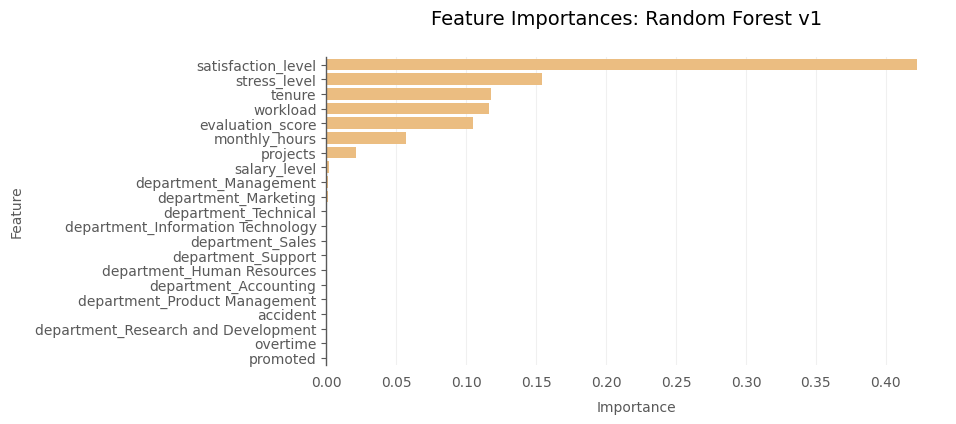

CPU times: user 1min 4s, sys: 13.4 s, total: 1min 18s
Wall time: 2h 11min 1s


In [82]:
%%time

# Build tuned model (pipeline)
rf1_model: Pipeline = build_tuned_model(model_metadata_dict["rf1"], RandomForestClassifier(random_state=42), X_tr, y_tr)

##### XGBoost v1

[XGBoost](https://xgboost.readthedocs.io/en/stable/), or eXtreme [Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting), is an ensemble learning method based on boosting. Unlike Random Forest, it builds decision trees (weak learners) sequentially, each compensating the weaknesses of its predecessors. While both Random Forest and XGBoost are powerful ensemble learning methods, XGBoost often achieves better predictive accuracy on various machine learning tasks, albeit at the cost of increased computational complexity.

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best score: 0.9221757322175732
Best parameters: {'clf__colsample_bytree': 0.9, 'clf__learning_rate': 0.3, 'clf__max_depth': 2, 'clf__min_child_weight': 0.1, 'clf__n_estimators': 300, 'clf__subsample': 1.0}


,Model,Accuracy,Precision,Recall,F1
0,XGBoost v1 (Training),0.9804,0.9591,0.9222,0.9398


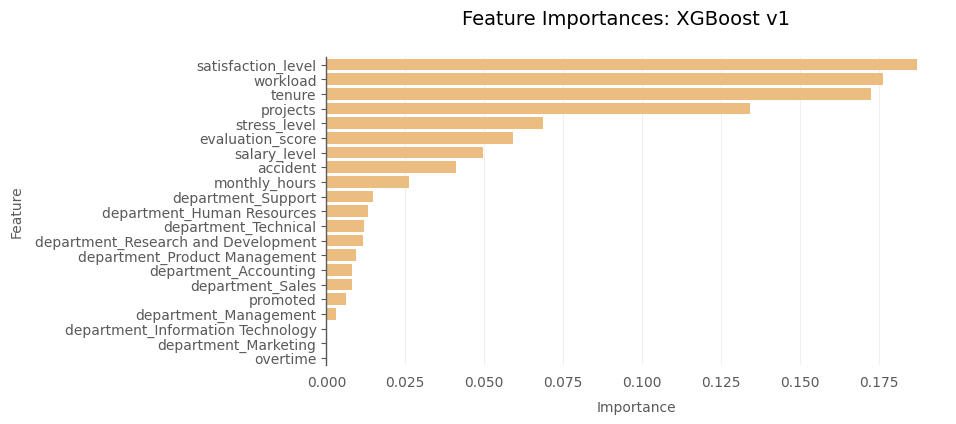

CPU times: user 48.8 s, sys: 6.81 s, total: 55.6 s
Wall time: 19min 51s


In [83]:
%%time

# Build tuned model (pipeline)
xgb1_model: Pipeline = build_tuned_model(model_metadata_dict["xgb1"], XGBClassifier(objective="binary:logistic", random_state=42), X_tr, y_tr)

##### Summary

Each of the three fine-tuned models demonstrated excellent performance on the cross-validated training data, achieving *recall* scores of over 0.91, with `XGBoost v1` showing the highest score of 0.9222. Furthermore, an analysis of the feature importances plots reveals that `overtime` (engineered), different `department`s, and `promoted` were consistently among the least important features for all models.

#### Feature Selection Revisited

With a clearer comprehension of the features considered significant by the models, we can now confidently eliminate those identified as least important. The objective is to streamline the models by removing irrelevant features, aiming for enhanced simplicity without compromising performance.

In [84]:
# Exclude features
department_features = X.columns[X.columns.str.startswith("department_")].tolist()
unimportant_features = ["promoted", "overtime"]
selected_features = [feature for feature in X.columns if feature not in (department_features + unimportant_features)]

# Show selected features
print(f"Selected features: {selected_features}")

Selected features: ['satisfaction_level', 'evaluation_score', 'projects', 'monthly_hours', 'tenure', 'accident', 'salary_level', 'workload', 'stress_level']


#### Iteration Round 2

In the second iteration round, we will reconstruct the models (version 2) using only the selected features. Similar to the previous iteration round, we will employ a cross-validated grid search to fine-tune our models.

##### Decision Tree v2

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best score: 0.9096234309623432
Best parameters: {'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


,Model,Accuracy,Precision,Recall,F1
0,Decision Tree v2 (Training),0.9776,0.9538,0.9096,0.931


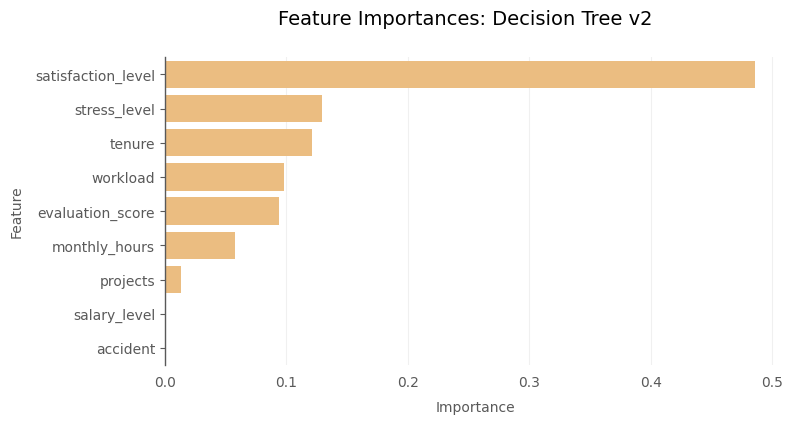

CPU times: user 807 ms, sys: 110 ms, total: 918 ms
Wall time: 4.48 s


In [85]:
%%time

# Build tuned model (pipeline)
dt2_model: Pipeline = build_tuned_model(model_metadata_dict["dt2"], DecisionTreeClassifier(random_state=42), X_tr, y_tr, feature_names=selected_features)

##### Random Forest v2

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best score: 0.9138075313807532
Best parameters: {'clf__max_depth': 8, 'clf__max_features': None, 'clf__max_samples': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 25}


,Model,Accuracy,Precision,Recall,F1
0,Random Forest v2 (Training),0.9823,0.9788,0.9138,0.9449


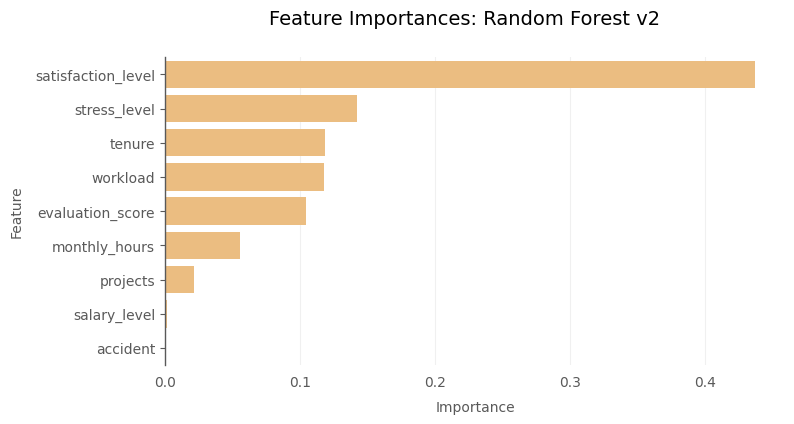

CPU times: user 1min 4s, sys: 12.8 s, total: 1min 17s
Wall time: 2h 12min 59s


In [86]:
%%time

# Build tuned model (pipeline)
rf2_model: Pipeline = build_tuned_model(model_metadata_dict["rf2"], RandomForestClassifier(random_state=42), X_tr, y_tr, feature_names=selected_features)

##### XGBoost v2

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best score: 0.9221757322175732
Best parameters: {'clf__colsample_bytree': 0.5, 'clf__learning_rate': 0.3, 'clf__max_depth': 2, 'clf__min_child_weight': 0.5, 'clf__n_estimators': 500, 'clf__subsample': 1.0}


,Model,Accuracy,Precision,Recall,F1
0,XGBoost v2 (Training),0.9796,0.9539,0.9222,0.9374


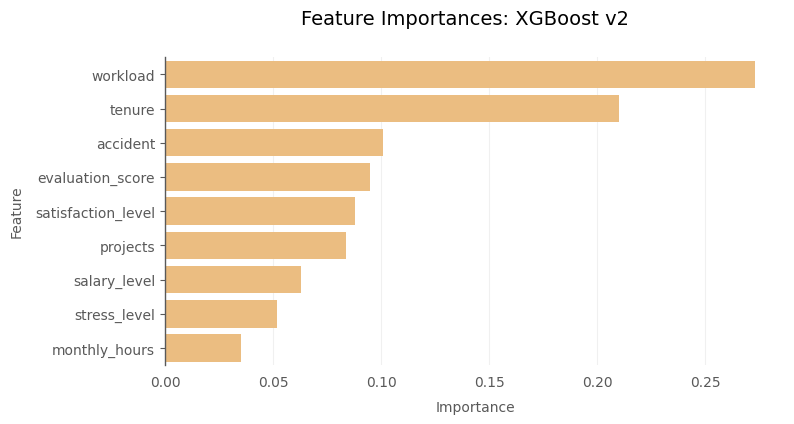

CPU times: user 38.4 s, sys: 5.41 s, total: 43.8 s
Wall time: 13min 35s


In [87]:
%%time

# Build tuned model (pipeline)
xgb2_model: Pipeline = build_tuned_model(model_metadata_dict["xgb2"], XGBClassifier(objective="binary:logistic", random_state=42), X_tr, y_tr, feature_names=selected_features)

##### Summary

Despite utilizing significantly fewer features in this iteration round, the *recall* scores for all three models remained relatively consistent, and once again, `XGBoost v2` outperformed the other two models with a strong *recall* score of 0.9222. Furthermore, all the selected features contribute to the model, making further iteration rounds unnecessary.

### 4.3 Model Selection

Here, we will compare the performance of our tuned models by predicting outcomes with a dedicated holdout dataset. The model demonstrating best overall performance on the validation data will be selected as a champion. Only the champion model will be evaluated using the test data.

In [88]:
# Compare models
champion_model: Pipeline
champion_model_metadata: dict[str, Any]
champion_model, champion_model_metadata = compare_tuned_models(model_metadata_dict, X_val, y_val)

,Model,Accuracy,Precision,Recall,F1
0,XGBoost v2 (Validation),0.9821,0.9587,0.9322,0.9452
1,Random Forest v2 (Validation),0.9842,0.9737,0.9296,0.9512
2,XGBoost v1 (Validation),0.9825,0.9635,0.9296,0.9463
3,Decision Tree v2 (Validation),0.9812,0.9584,0.9271,0.9425
4,Random Forest v1 (Validation),0.9846,0.9788,0.9271,0.9523
5,Decision Tree v1 (Validation),0.9800,0.9534,0.9246,0.9388


According to the results in the comparison table, all tree-based models performed exceptionally well on the validation data, with `XGBoost v2` achieving the highest *recall* score of 0.9322. We will select `XGBoost v2` as our champion model not only for its predictive accuracy, but also for its use of fewer features, robustness, and interpretability.

### 4.4 Model Evaluation

After a thorough process of model building and selection, we have finally reached the stage where we evaluate our champion model. But before doing so, we will first refit the champion model to all available training data (a combination of training and validation data), and then use that model to predict on the unseen test data in order to obtain an unbiased estimate of its performance on future data.

In [89]:
# Get champion model metadata
champion_model_abbreviation = champion_model_metadata["abbreviation"]
champion_model_version = champion_model_metadata["version"]
champion_model_name = champion_model_metadata["name"]
champion_model_name = f"{champion_model_name} v{champion_model_version}"

In [90]:
%%time

# Refit model to all training data (tr + val)
champion_model = champion_model.fit(X_train, y_train)

CPU times: user 925 ms, sys: 45.9 ms, total: 971 ms
Wall time: 335 ms


In [91]:
# Save model
save_model(f"{champion_model_abbreviation}{champion_model_version}_pipeline_train_hr_dataset.pkl", champion_model)

,Model,Accuracy,Precision,Recall,F1
0,XGBoost v2 (Test),0.9821,0.9563,0.9347,0.9454


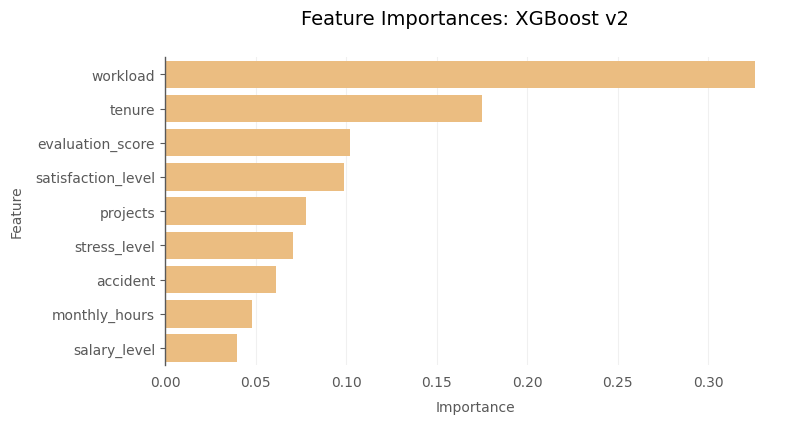

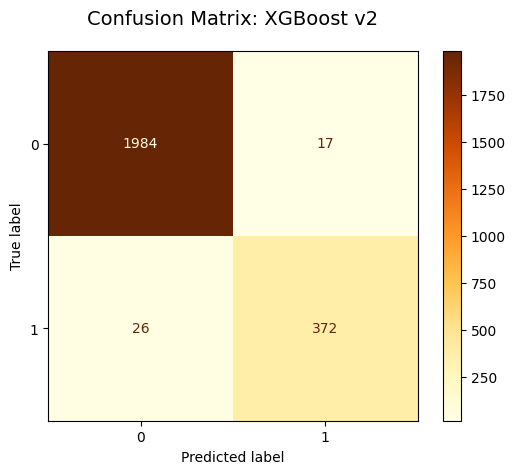

In [92]:
# Evaluate model
evaluate_model(champion_model_metadata, champion_model, X_test, y_test)

The evaluation results on the test data demonstrate that our champion model excelled across all four evaluation metrics. The *recall* score was an impressive 0.9347, meaning that the model was able to identify leaving employees with 93.5% accuracy.

The feature importances plot illustrates that `workload` and `tenure` are the two most important features for the model, with the former being engineered. The other engineered feature, `stress_level`, also contributes to the model's predictive power, along with all the other remaining features.

By inspecting the confusion matrix, we observe that the model correctly predicts many true negatives (1984) and true positives (372), with minimal occurrences of false negatives (26) and false positives (17). This aligns with expectations, considering the high accuracy in both *precision* and *recall* scores and the *moderately* imbalanced nature of the target variable skewed toward negatives.

### 4.5 Model Finalization

As a final touch, we will retrain our champion model using the entire dataset, including the training data, the validation data, and the test data. This procedure ensures that the model is optimized to be as predictive as possible prior to its deployment into live environments.

In [93]:
%%time

# Refit model to all data (tr + val + test)
champion_model_final = champion_model.fit(X, y)

CPU times: user 861 ms, sys: 25.9 ms, total: 887 ms
Wall time: 259 ms


In [94]:
# Save model (pipeline)
save_model(f"{champion_model_abbreviation}{champion_model_version}_pipeline_full_hr_dataset.pkl", champion_model_final)

### 4.6 Summary

- Three tree-based supervised learning algorithms—`Decision Tree`, `Random Forest`, `XGBoost`—were selected to predict employee attrition based on the features in the HR dataset.
- A total of six classification models were built and evaluated, comparing their performance using standard evaluation metrics, such as accuracy, precision, recall (primary), and F1 score.
- In the model comparison, `XGBoost v2` stood out as the top performer, showcasing an impressive *recall* score of 0.9322 on the validation data and an even higher score of 0.9347 on the test data.
- The four most important features for the model for predicting employee attrition were: `workload` (engineered), `tenure`, `evaluation_score`, and `satisfaction_level`.
- The performance of the model could be potentially improved by (i) collecting more data, such as office location in future surveys and (ii) optimizing the model's decision threshold, specifically by lowering it from the default value of 0.5, to attain the highest possible *recall* score.

---
## 5 Conclusion

Salifort Motors faces a significant employee turnover challenge, with an attrition rate of 16.6%. This analysis identifies three main factors contributing to this trend: high workloads, limited career advancement opportunities, and burnout among high performers.

To address these concerns, we recommend a comprehensive strategy that includes:

- **Workload balancing:** Distribute projects equitably to reduce excessive workloads.
- **Promotion strategies:** Implement structured promotion plans to identify and support high performers.
- **Well-being initiatives:** Foster a culture of employee well-being and appreciation through flexible work arrangements, stress management programs, and meaningful recognition.
- **Proactive attrition mitigation:** Deploy the `XGBoost v2` model, which achieved an outstanding *recall* score of 0.9347, to identify employees at risk of leaving and implement preventative measures.

By implementing these recommendations, Salifort Motors can effectively combat employee turnover, enhance employee satisfaction, and cultivate a thriving workforce.